In [20]:
import numpy as np  # Importing NumPy for numerical operations, which provides support for large multidimensional arrays and matrices, along with a collection of mathematical functions.
import pandas as pd  # Importing Pandas for data manipulation, specifically for handling and analyzing time series data in a structured format (DataFrame).
import yfinance as yf  # Importing yfinance to download financial data from Yahoo Finance.
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations and plots of data.
from sklearn.preprocessing import MinMaxScaler  # Importing MinMaxScaler for scaling the data to a specified range, typically [0, 1], to improve the performance of machine learning algorithms.
from tensorflow.keras.models import Sequential  # Importing the Sequential model from Keras to build a linear stack of layers for the neural network.
from tensorflow.keras.layers import LSTM, Dense, Dropout  # Importing LSTM (Long Short-Term Memory) layers for the model, Dense layers for output, and Dropout layers to prevent overfitting.
from tensorflow.keras.callbacks import EarlyStopping  # Importing EarlyStopping to monitor the model's performance during training and stop training early if performance doesn't improve.
from datetime import datetime, timedelta  # Importing datetime and timedelta for handling dates and creating future date ranges.
from sklearn.metrics import mean_squared_error, r2_score  # Importing metrics for evaluating model performance, specifically Mean Squared Error (MSE) and R² score.


In [21]:
# Getting today's date in YYYY-MM-DD format
today = datetime.now().strftime("%Y-%m-%d")  # Fetches the current date and formats it as a string.

# Downloading Bitcoin data from Yahoo Finance starting from January 1, 2020, to today's date
data = yf.download("BTC-USD", start="2020-01-01", end=today)  # Downloads historical Bitcoin price data (closing prices).

# Keeping only the 'Close' prices from the data
data = data[['Close']]  # Extracts only the 'Close' prices to analyze.

# Scaling the data to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))  # Initializes the scaler to transform data into a range between 0 and 1.
scaled_data = scaler.fit_transform(data)  # Fits the scaler to the data and transforms it.

# Creating training data
train_size = int(len(scaled_data) * 0.8)  # Calculates the number of samples for training (80% of the total data).
train_data = scaled_data[:train_size]  # Slices the scaled data to get the training portion.
x_train, y_train = [], []  # Initializes lists to hold training features (input) and labels (output).

# Creating the input (x_train) and output (y_train) for the model
for i in range(60, len(train_data)):  # Loops through the training data starting from the 60th sample.
    x_train.append(train_data[i-60:i, 0])  # Appends the last 60 days' prices as the input feature.
    y_train.append(train_data[i, 0])  # Appends the price at the current index as the output label.

# Converting lists to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)  # Converts the lists to NumPy arrays for model input.
# Reshaping the input to be 3D [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  # Reshapes x_train to be 3D, required for LSTM input.


[*********************100%***********************]  1 of 1 completed


In [22]:
# Creating the LSTM model
model = Sequential()  # Initializes the model as a Sequential model (linear stack of layers).
# Adding the first LSTM layer with 100 units and specifying the input shape
model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1], 1)))  
model.add(Dropout(0.2))  # Adds a Dropout layer (20% of neurons will be dropped during training) to prevent overfitting.
model.add(LSTM(units=100, return_sequences=True))  # Adds another LSTM layer with 100 units and return_sequences=True for stacking.
model.add(Dropout(0.2))  # Adds another Dropout layer to further reduce overfitting.
model.add(LSTM(units=100, return_sequences=False))  # Adds the final LSTM layer, with return_sequences=False as it's the last layer.
model.add(Dropout(0.2))  # Adds another Dropout layer.
model.add(Dense(units=1))  # Adds a Dense layer with 1 unit as the output layer for predicting the price.

# Compiling the model with Adam optimizer and mean squared error loss function
model.compile(optimizer='adam', loss='mean_squared_error')  # Compiles the model with Adam optimizer and specifies MSE as the loss function.

# Creating an EarlyStopping callback to stop training when the model is not improving
early_stopping = EarlyStopping(monitor='loss', patience=5)  # Sets up early stopping based on the training loss with a patience of 5 epochs.

# Training the model for 100 epochs with a batch size of 32
model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping])  # Trains the model on the training data.


Epoch 1/100


42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0324
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0036
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0031
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0026
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0030
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0028
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0022
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0025
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0024
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0023
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022
Epoch 13/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0021
Epoch 14/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0015
Epoch 15/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0016
E

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


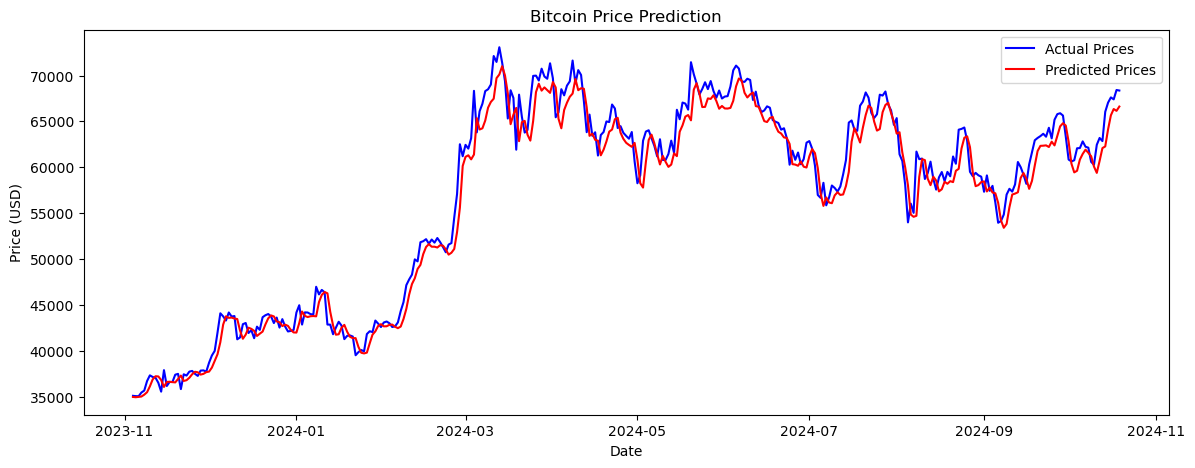

Mean Squared Error (MSE): 3564094.44
Root Mean Squared Error (RMSE): 1887.88
R² Score: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Upcoming 1-week Bitcoin price predictions:
Date: 2024-10-20, Predicted Price: 66857.44 USD
Date: 2024-10-21, Predicted Price: 65865.55 USD
Date: 2024-10-22, Predicted Price: 64720.47 USD
Date: 2024-10-23, Predicted Price: 63649.91 USD
Date: 2024-10-24, Predicted Price: 62715.23 USD
Date: 2024-10-25, Predicted Price: 61906.89 USD
Date: 2024-10-26, Predicted Price: 61193.87 USD

Latest actual closing price: 68362.73 USD


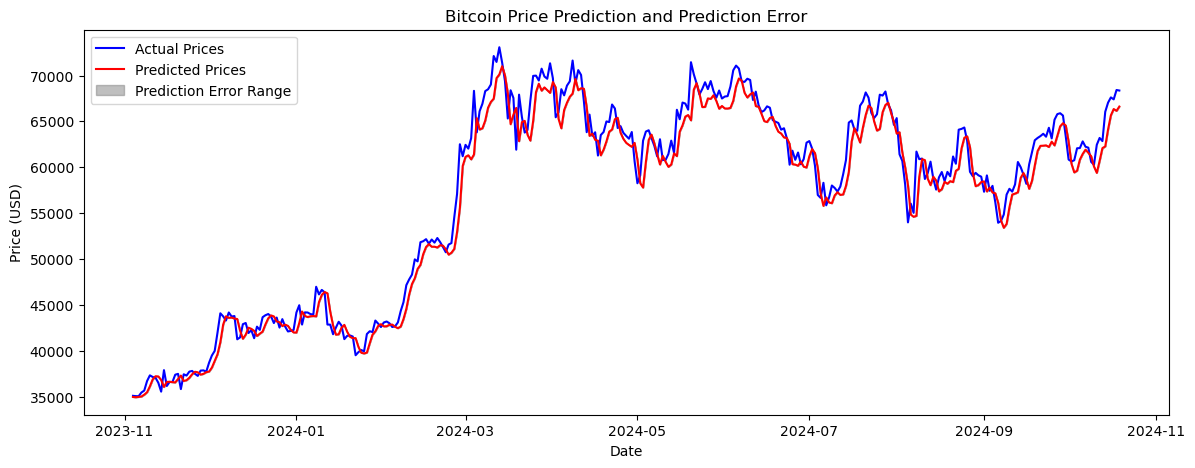

In [23]:
# Preparing test data
test_data = scaled_data[train_size - 60:]  # Gets the last 60 days from the training data for testing.
x_test, y_test = [], data['Close'][train_size:].values  # Initializes x_test for model input and y_test for actual output.

# Creating the input for the test set
for i in range(60, len(test_data)):  # Loops through the test data starting from the 60th sample.
    x_test.append(test_data[i-60:i, 0])  # Appends the last 60 days' prices as the input feature for testing.

# Converting test input to NumPy array and reshaping it
x_test = np.array(x_test)  # Converts the list to a NumPy array for model input.
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  # Reshapes x_test to be 3D, required for LSTM input.

# Making predictions with the model
predictions = model.predict(x_test)  # Uses the trained model to make predictions on the test input.
predictions = scaler.inverse_transform(predictions)  # Inverses the scaling to get actual price predictions.

# Visualizing the results
plt.figure(figsize=(14, 5))  # Sets the figure size for the plot.
plt.plot(data.index[train_size:], y_test, color='blue', label='Actual Prices')  # Plots actual closing prices in blue.
plt.plot(data.index[train_size:], predictions, color='red', label='Predicted Prices')  # Plots predicted prices in red.
plt.title('Bitcoin Price Prediction')  # Sets the title of the plot.
plt.xlabel('Date')  # Sets the x-axis label.
plt.ylabel('Price (USD)')  # Sets the y-axis label.
plt.legend()  # Displays the legend for the plot.
plt.show()  # Renders the plot.

# Calculating prediction errors
mse = mean_squared_error(y_test, predictions)  # Calculates the Mean Squared Error between actual and predicted prices.
rmse = np.sqrt(mse)  # Calculates the Root Mean Squared Error from the MSE for better interpretability.
r2 = r2_score(y_test, predictions)  # Calculates the R² score to evaluate how well the predicted prices fit the actual prices.
print(f"Mean Squared Error (MSE): {mse:.2f}")  # Prints the Mean Squared Error.
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")  # Prints the Root Mean Squared Error.
print(f"R² Score: {r2:.2f}")  # Prints the R² score.

# Making 1-week predictions
last_60_days = scaled_data[-60:]  # Takes the last 60 days of scaled data to make future predictions.
last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))  # Reshapes it to fit the model input shape.

future_predictions = []  # Initializes a list to hold future predictions.
for _ in range(7):  # Loops to make predictions for the next 7 days.
    next_price = model.predict(last_60_days)  # Predicts the next price using the last 60 days' data.
    future_predictions.append(next_price[0][0])  # Appends the predicted price to the future predictions list.
    next_price = np.reshape(next_price, (1, 1, 1))  # Reshapes the predicted price to fit the input shape for the next iteration.
    last_60_days = np.append(last_60_days[:, 1:, :], next_price, axis=1)  # Updates the last 60 days' data with the new predicted price.

# Inversing the scaling of future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))  # Converts the scaled predictions back to original price scale.

# Printing the predicted prices and dates
today = datetime.today()  # Gets the current date for making predictions.
print("Upcoming 1-week Bitcoin price predictions:")  # Prints a header for the upcoming predictions.
for i in range(7):  # Loops for the next 7 days.
    predicted_date = today + timedelta(days=i)  # Calculates the predicted date by adding days to today.
    print(f"Date: {predicted_date.strftime('%Y-%m-%d')}, Predicted Price: {future_predictions[i][0]:.2f} USD")  # Prints the predicted date and price.

# Showing the latest actual closing price
latest_close_price = data['Close'].iloc[-1]  # Retrieves the last closing price from the data.
print(f"\nLatest actual closing price: {latest_close_price:.2f} USD")  # Prints the latest actual closing price.

# Visualizing the prediction errors
plt.figure(figsize=(14, 5))  # Sets the figure size for the plot.
plt.plot(data.index[train_size:], y_test, color='blue', label='Actual Prices')  # Plots actual closing prices in blue.
plt.plot(data.index[train_size:], predictions, color='red', label='Predicted Prices')  # Plots predicted prices in red.
# Adding a shaded area for the prediction error range
plt.fill_between(data.index[train_size:], predictions.flatten() - 0.1, predictions.flatten() + 0.1, 
                 color='gray', alpha=0.5, label='Prediction Error Range')  # Fills the area between the prediction error range.
plt.title('Bitcoin Price Prediction and Prediction Error')  # Sets the title of the error plot.
plt.xlabel('Date')  # Sets the x-axis label.
plt.ylabel('Price (USD)')  # Sets the y-axis label.
plt.legend()  # Displays the legend for the plot.
plt.show()  # Renders the plot.